## GOAL

"What kind of book sells well on Amazon’s self-publishing platform?"

### IMPORTING NECESSARY LIBRARIES

In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### LOADING DATA

In [39]:
data = pd.read_csv("Amazon-books.csv")

In [40]:
data.head()

,Title,Rank,Reviews,Review Count,Price,Genre,Manufacturer,Brand,Author,Number of Pages
0,"Fourth Wing (The Empyrean, 1)",1,4.8,135916,18.69,Fantasy,Entangled: Red Tower Books,Macmillan,Rebecca Yarros,528.0
1,Atomic Habits: An Easy & Proven Way to Build G...,2,4.8,120356,12.50,Personal Transformation,Avery,Avery,James Clear,320.0
2,"Iron Flame (The Empyrean, 2)",3,4.7,79851,14.78,Epic,Entangled: Red Tower Books,Kiligry,Rebecca Yarros,640.0
3,"Dinner Tonight: 100 Simple, Healthy Recipes fo...",4,4.1,6,26.00,Natural Foods,William Morrow Cookbooks,NaN,Alex Snodgrass,256.0
4,Oath and Honor: A Memoir and a Warning,5,4.8,3536,21.49,Political,"Little, Brown and Company",NaN,Liz Cheney,384.0


### PROJECT SCOPING

*Key Questions*
   *  What genres sell best on Amazon?

   *  What is the average page count for a bestselling book?

   *  What is the optimal price range?

   *  How are user ratings and the number of reviews distributed among the most successful genres?

   *  Do high user rating or higher number of reviews have an impact on the Price of a book?


#### Initial Analysis:

*Finding shape of the dataset, datatypes, missing values, duplicates, Outliers.*

In [41]:
# shape of the data
data.shape

(4846, 10)

In [42]:
# Finding missing data and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            4846 non-null   object 
 1   Rank             4846 non-null   int64  
 2   Reviews          4846 non-null   float64
 3   Review Count     4846 non-null   int64  
 4   Price            4846 non-null   float64
 5   Genre            4846 non-null   object 
 6   Manufacturer     4846 non-null   object 
 7   Brand            3144 non-null   object 
 8   Author           4846 non-null   object 
 9   Number of Pages  4775 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 378.7+ KB


In [43]:
# checking for duplicates
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [44]:
# Finding the number of missing values
data.isnull().sum()

Title                 0
Rank                  0
Reviews               0
Review Count          0
Price                 0
Genre                 0
Manufacturer          0
Brand              1702
Author                0
Number of Pages      71
dtype: int64

In [45]:
# checking statistics
data.describe()

,Rank,Reviews,Review Count,Price,Number of Pages
count,4846.000000,4846.000000,4846.000000,4846.000000,4775.000000
mean,2533.388774,4.662299,12735.633306,13.098601,347.739686
std,1500.594167,0.225194,28780.356812,10.248512,415.874433
min,1.000000,1.000000,1.000000,0.150000,1.000000
25%,1242.750000,4.600000,943.500000,7.412500,128.000000
50%,2501.500000,4.700000,4010.000000,11.100000,272.000000
75%,3768.750000,4.800000,12033.000000,15.667500,408.000000
max,15176.000000,5.000000,621499.000000,199.990000,5280.000000


There may be outliers in the 'Number of Pages' column. 

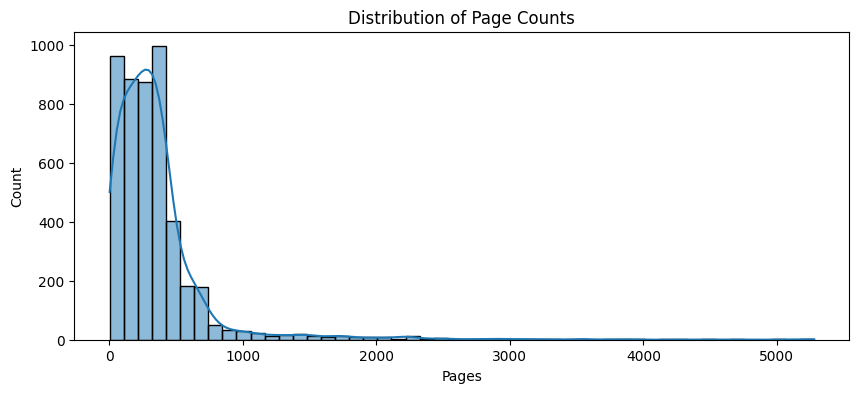

In [46]:
# Visualizing 'Number of Pages' Column for possible outliers
plt.figure(figsize=(10, 4))
sns.histplot(data["Number of Pages"], bins=50, kde=True)
plt.title("Distribution of Page Counts")
plt.xlabel("Pages")
plt.show()

#### Initial Observations:
* The dataset has 4846 rows and 10 columns
* There are missing values in columns ***'Brand'*** and ***'Number of Pages'***
* There are some outliers in the ***'Number of Pages*** column.




### CLEANING DATA


* *Dropping non-useful columns (Brand)*
* *Handling missing page numbers*
* *Renaming column name 'Reviews' to 'Ratings'*
* *Removing Outliers*

In [47]:
#Dropping the irrelevant column 'Brand'
data = data.drop(columns=['Brand'])


#Droping rows with missing 'Number of Pages'
data = data.dropna(subset=["Number of Pages"])


# Filtering out books with more than 2000 pages(Removing Outliers)
data = data[data["Number of Pages"] <= 2000]


# Renaming Reviews column to Ratings
data.rename(columns={'Reviews': 'Ratings'}, inplace=True)

In [48]:
data.shape

(4710, 9)

**The Cleaned dataset has 4710 rows and 9 Columns**

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4710 entries, 0 to 4845
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            4710 non-null   object 
 1   Rank             4710 non-null   int64  
 2   Ratings          4710 non-null   float64
 3   Review Count     4710 non-null   int64  
 4   Price            4710 non-null   float64
 5   Genre            4710 non-null   object 
 6   Manufacturer     4710 non-null   object 
 7   Author           4710 non-null   object 
 8   Number of Pages  4710 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 368.0+ KB


### EXPLORING DATA

In [50]:
# filtering warnings
import warnings
warnings.filterwarnings('ignore')

**Genre** - *What Genre has the best selling books?*

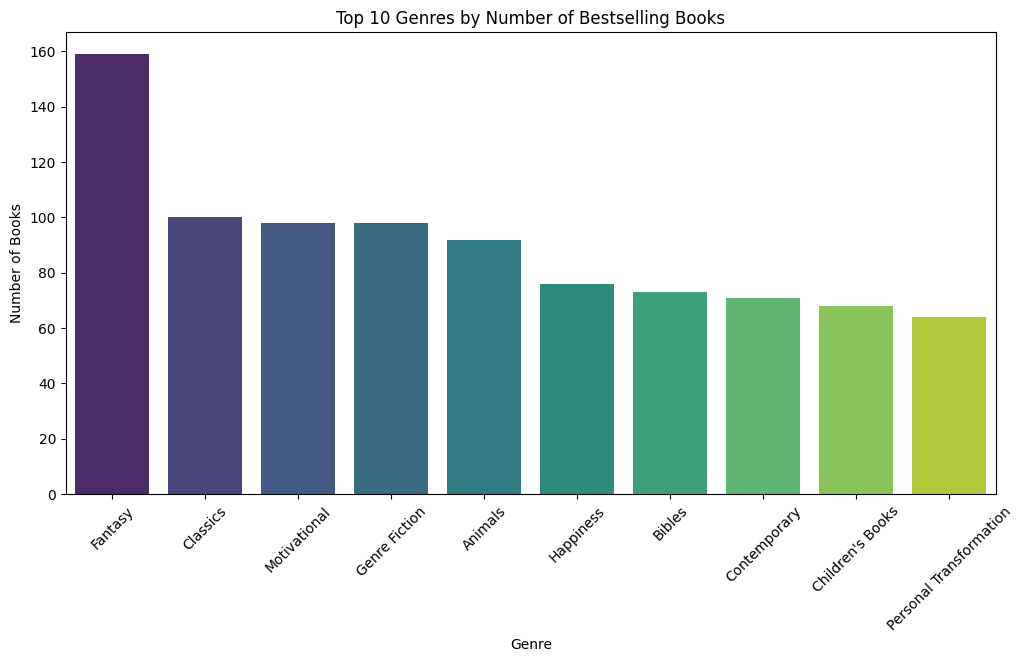

In [51]:
# Count of books by genre
plt.figure(figsize=(12, 6))
genre_counts = data["Genre"].value_counts().head(10)
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.title("Top 10 Genres by Number of Bestselling Books")
plt.xlabel("Genre")
plt.ylabel("Number of Books")
plt.xticks(rotation = 45)
plt.show()

**Number of Pages** -- *What is the average page count for a bestselling book?*


In [52]:
# Calculate the average number of pages
average_pages = round(data["Number of Pages"].mean())
print(f"Average number of pages: {(average_pages)}")

Average number of pages: 313


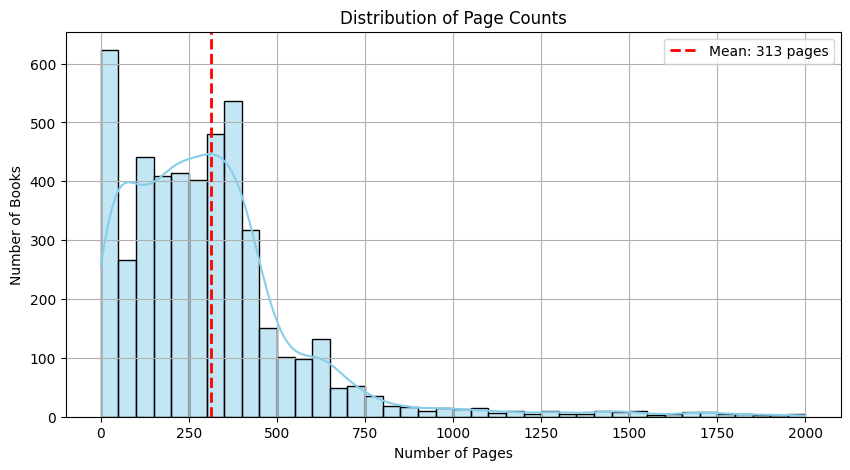

In [53]:
# Histogram of page counts
plt.figure(figsize=(10, 5))
sns.histplot(data["Number of Pages"], bins=40, kde=True, color="skyblue")
plt.axvline(average_pages, color='red', linestyle='--', linewidth=2, label=f'Mean: {average_pages:.0f} pages')
plt.title("Distribution of Page Counts")
plt.xlabel("Number of Pages")
plt.ylabel("Number of Books")
plt.legend()
plt.grid(True)
plt.show()

**Price Range** - *what is the optimal price range?*

In [54]:
data['Price'].describe()

count    4710.000000
mean       12.445042
std         7.953599
min         0.150000
25%         7.322500
50%        10.990000
75%        15.205000
max       143.630000
Name: Price, dtype: float64

In [55]:
Average_price = round(data["Price"].mean())
print(f"Average Price: {(Average_price)}")

Average Price: 12


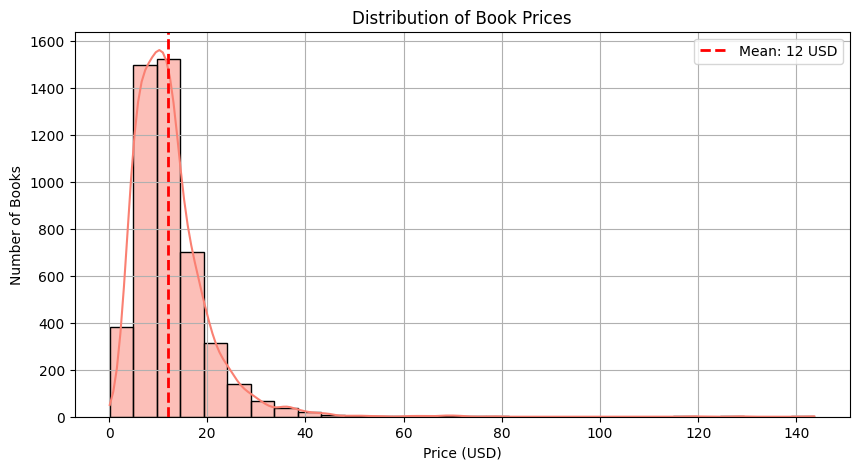

In [56]:
# Price distribution
plt.figure(figsize=(10, 5))
sns.histplot(data["Price"], bins=30, kde=True, color="salmon")
plt.axvline(Average_price, color='red', linestyle='--', linewidth=2, label=f'Mean: {Average_price:.0f} USD')

plt.title("Distribution of Book Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Number of Books")
plt.legend()
plt.grid(True)
plt.show()


**Checking the average price of the number of books for each Genre**

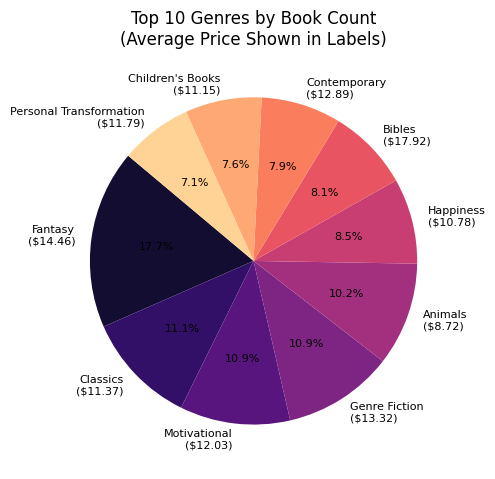

In [57]:
# Compute top 10 genres by book count and average price
genre_stats = data.groupby("Genre").agg(
    Book_Count=("Title", "count"),
    Avg_Price=("Price", "mean")
).sort_values("Book_Count", ascending=False).head(10)

# Create labels that include average price
labels = [f"{genre}\n(${price:.2f})" for genre, price in zip(genre_stats.index, genre_stats["Avg_Price"])]

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    genre_stats["Book_Count"],
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("magma", len(genre_stats)),
    textprops={'fontsize': 8}
)

plt.title("Top 10 Genres by Book Count\n(Average Price Shown in Labels)", fontsize=12)
plt.axis("equal")
plt.tight_layout()
plt.show()

**Ratings vs Review Count per Genre** - *How are user ratings and the number of reviews distributed among the most successful genres?*

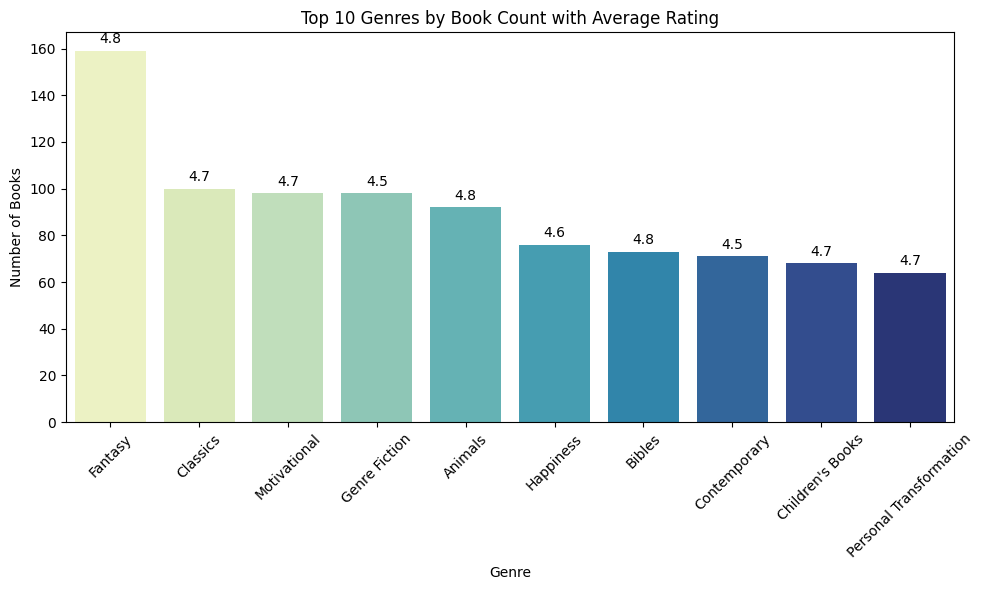

In [58]:
# count of books and average rating per genre
genre_stats = data.groupby("Genre").agg(
    Book_Count=("Title", "count"),
    Avg_Rating=("Ratings", "mean")
).sort_values("Book_Count", ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=genre_stats.index, y=genre_stats["Book_Count"], palette="YlGnBu")

# Adding average price as text annotations above each bar
for index, value in enumerate(genre_stats["Book_Count"]):
    avg_rating = genre_stats["Avg_Rating"].iloc[index]
    plt.text(index, value + 2, f"{avg_rating:.1f}", ha='center', va='bottom', fontsize=10, color='black')

plt.title("Top 10 Genres by Book Count with Average Rating")
plt.xlabel("Genre")
plt.ylabel("Number of Books")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

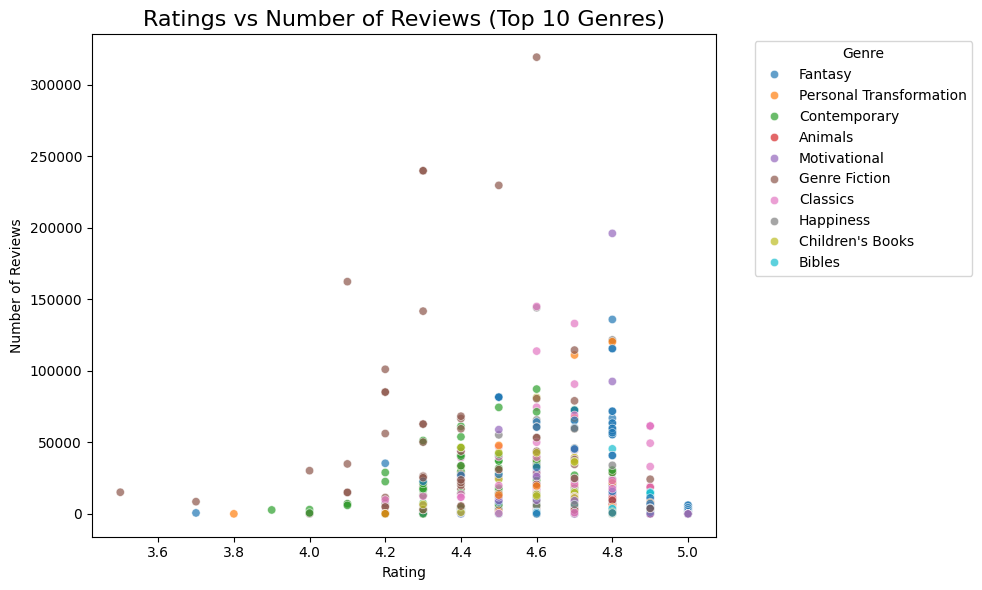

In [59]:
# Ratings vs Number of Reviews per Genre
top_genres = data['Genre'].value_counts().nlargest(10).index
filtered_data = data[data['Genre'].isin(top_genres)]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_data,
    x="Ratings",
    y="Review Count",
    hue="Genre",
    alpha=0.7
)

plt.title("Ratings vs Number of Reviews (Top 10 Genres)", fontsize=16)
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Genre")
plt.tight_layout()
plt.show()

**Correlations** - *Do high user rating or higher number of reviews have an impact on the Price of a book?*


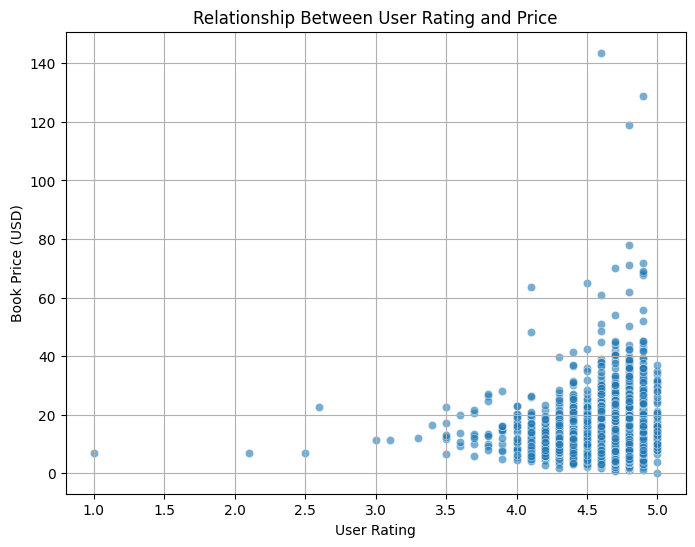

In [60]:
# Scatter plot: Ratings vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Ratings', y='Price', alpha=0.6)
plt.title('Relationship Between User Rating and Price')
plt.xlabel('User Rating')
plt.ylabel('Book Price (USD)')
plt.grid(True)
plt.show()

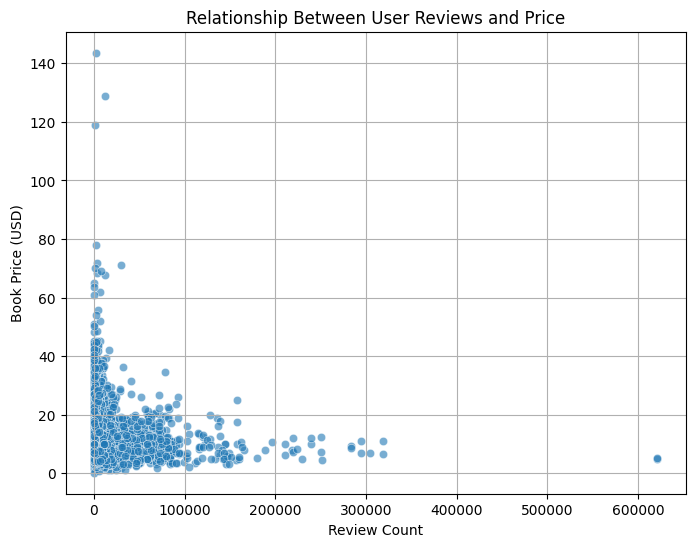

In [61]:
# Scatter plot: Review Count vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Review Count', y='Price', alpha=0.6)
plt.title('Relationship Between User Reviews and Price')
plt.xlabel('Review Count')
plt.ylabel('Book Price (USD)')
plt.grid(True)
plt.show()

**Checking relationship of Price with Ratings, Review Count, Number of Pages**

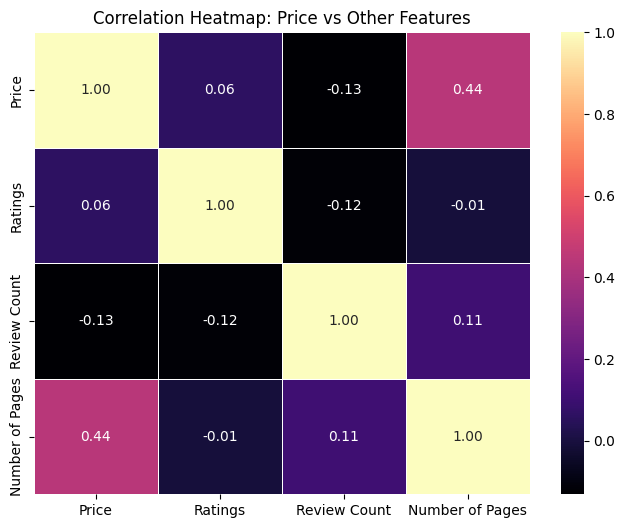

In [62]:
# Selecting the relevant numeric columns
cols_to_check = ['Price', 'Ratings', 'Review Count', 'Number of Pages']
subset_data = data[cols_to_check]

# Compute correlation matrix
correlation_matrix = subset_data.corr()

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f",linewidths=0.5)
plt.title('Correlation Heatmap: Price vs Other Features')
plt.show()


*The Price seems to increase a little when number of pages increase, but it is only moderate. The Ratings and Review count seem to have weak relation with Price* 

### Key Insights

  * What genres sell best on Amazon?
    
    *Fantasy, Classics, and Motivational genres are the most common among Amazon bestsellers.*

  * What is the average page count for a bestselling book?

    *The average page count of bestselling books is approximately 313 pages.*

  * What is the optimal price range?

    *Most bestsellers are priced between $10 and $15 showing affordability.*

  * How are user ratings and the number of reviews distributed among the most successful genres?

    *Books in the top-selling genres tend to receive both higher ratings and more reviews.* 

  * Do high ratings or review counts impact the price of a book?

    *There is no strong correlation between user ratings/review counts and book price. High-rated or highly-reviewed books exist at all price points.*






#### Recommendations

 **Genre**:        ----     *Focus on Fantasy, Classics, or Motivational content*  

 **Page Count**:   ----    *Aim for 300–320 pages*  

 **Price**:        ----   *Set price range between $10 and $15* 

 **For Honest ratings and reviews** : ---- *Consider including book inserts/Reaching out to the reader communities for feedback.*



#### Limitations

* Data doesnt have information to differentiate self- publishers and traditional publishers.

* No data to know the format of the book - Audio, paperback, Hardcover or Kindle which will have impact on the Price of a book. Other data like dimensions, printing requirements are also not available.

* The dataset does not include the publication year of the books. This limits our ability to analyze trends over time. 




#### Potential Future Analysis 

* Author column can be explored to see if Author popularity has impact on sales.

* Manufacturers can be looked into for pricing insights/comparison.
